In [99]:
import pandas as pd
import numpy as np

### Basics

In [100]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})

df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [101]:
g = df.groupby('key')['value']

g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [102]:
from datetime import datetime

now = datetime.now()

now

datetime.datetime(2025, 1, 14, 19, 21, 56, 776050)

In [103]:
now.year, now.month, now.day

(2025, 1, 14)

In [104]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

print(delta)
print(delta.days)
print(delta.seconds)

926 days, 15:45:00
926
56700


### Distance to the neighbours

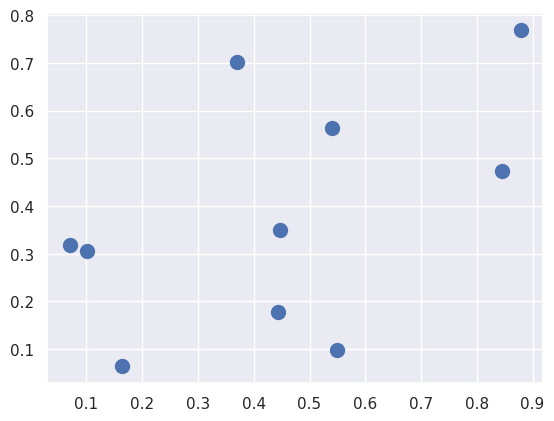

In [105]:
X = np.random.rand(10, 2)

import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, -1], s=100);

In [106]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [107]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [108]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [109]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [110]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 2 7 1 4 5 9 3 8 6]
 [1 5 0 7 9 4 2 3 8 6]
 [2 0 7 3 8 5 1 4 9 6]
 [3 8 6 7 4 2 9 0 1 5]
 [4 9 7 6 3 0 8 1 2 5]
 [5 1 0 2 7 4 9 3 8 6]
 [6 3 8 4 9 7 0 2 1 5]
 [7 4 0 9 3 2 8 6 1 5]
 [8 3 6 7 4 2 9 0 1 5]
 [9 4 7 6 0 1 3 8 2 5]]


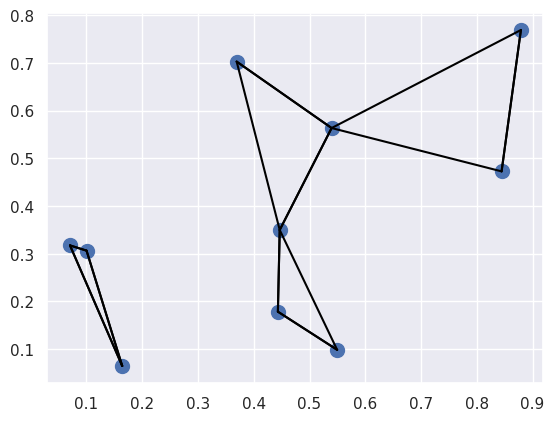

In [111]:
K=2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)
plt.scatter(X[:, 0], X[:, 1], s=100)

K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

### Structured Data: NumPy's Structured Arrays

In [112]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [113]:
x = np.zeros(4, dtype=int)

data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', "f8")})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [114]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [115]:
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [116]:
data[0]

np.void(('Alice', 25, 55.0), dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [117]:
data[-1]['name']

np.str_('Doug')

In [118]:
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

### Pandas

In [119]:
pd.__version__

'2.2.3'

In [120]:
!pd?

Type:        module
String form: <module 'pandas' from '/home/kenuey/.local/lib/python3.10/site-packages/pandas/__init__.py'>
File:        ~/.local/lib/python3.10/site-packages/pandas/__init__.py
Docstring:  
pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be inserted

In [121]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [122]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [123]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [124]:
data[1]

np.float64(0.5)

In [125]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [126]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [127]:
data['b']

np.float64(0.5)

### Series as specialized dictionary

In [128]:
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [129]:
population['California']

np.int64(38332521)

In [130]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [131]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [132]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

### The Pandas DataFrame Object

In [133]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
'Florida': 170312, 'Illinois': 149995}

In [134]:
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [135]:
states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [136]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [137]:
states.columns

Index(['population', 'area'], dtype='object')

In [138]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

From a single Series object. A DataFrame is a collection of Series objects, and a singlecolumn
DataFrame can be constructed from a single Series:

In [139]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


From a list of dicts. Any list of dictionaries can be made into a DataFrame. We’ll use a
simple list comprehension to create some data

In [140]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


From a dictionary of Series objects. As we saw before, a DataFrame can be constructed
from a dictionary of Series objects as well:

In [141]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


From a two-dimensional NumPy array. Given a two-dimensional array of data, we can
create a DataFrame with any specified column and index names. If omitted, an integer
index will be used for each:

In [142]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.959812,0.671802
b,0.911736,0.198266
c,0.088328,0.939352


From a NumPy structured array. We covered structured arrays in “Structured Data:
NumPy’s Structured Arrays” on page 92. A Pandas DataFrame operates much like a
structured array, and can be created directly from one:

In [143]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [144]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### The Pandas Index Object

In [145]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

In [146]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


Index as immutable array

One difference between Index objects and NumPy arrays is that indices are immutable—
that is, they cannot be modified via the normal means:

In [147]:
# ind[1] = 0 

Index as ordered set

In [148]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])


In [149]:
indA & indB # intersection

Index([0, 3, 5, 7, 9], dtype='int64')

In [150]:
indA | indB # union

Index([3, 3, 5, 7, 11], dtype='int64')

In [151]:
indA ^ indB # symmetric difference

Index([3, 0, 0, 0, 2], dtype='int64')

### Data Selection in DataFrame

In [152]:
area = pd.Series({'California': 423967, 'Texas': 695662,
'New York': 141297, 'Florida': 170312,
'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127, 'Florida': 19552860,
'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [153]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [154]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [155]:
data['area'] is data.area

True

In [156]:
# data.pop('pop')
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [157]:
data['density'] = data['pop'] / data['area']

data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


DataFrame as two-dimensional array

In [158]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [159]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [161]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [162]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [168]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [169]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [174]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [171]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [172]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [173]:
data.dropna()

0        1
2    hello
dtype: object

In [175]:
df = pd.DataFrame([[1, np.nan, 2],
[2, 3, 5],
[np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [176]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [177]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


### GroupBy: Split, Apply, Combine

In [178]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [180]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### Pandas Time Series: Indexing by Time

In [181]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
'2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [182]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [183]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [185]:
import matplotlib.pyplot as plt

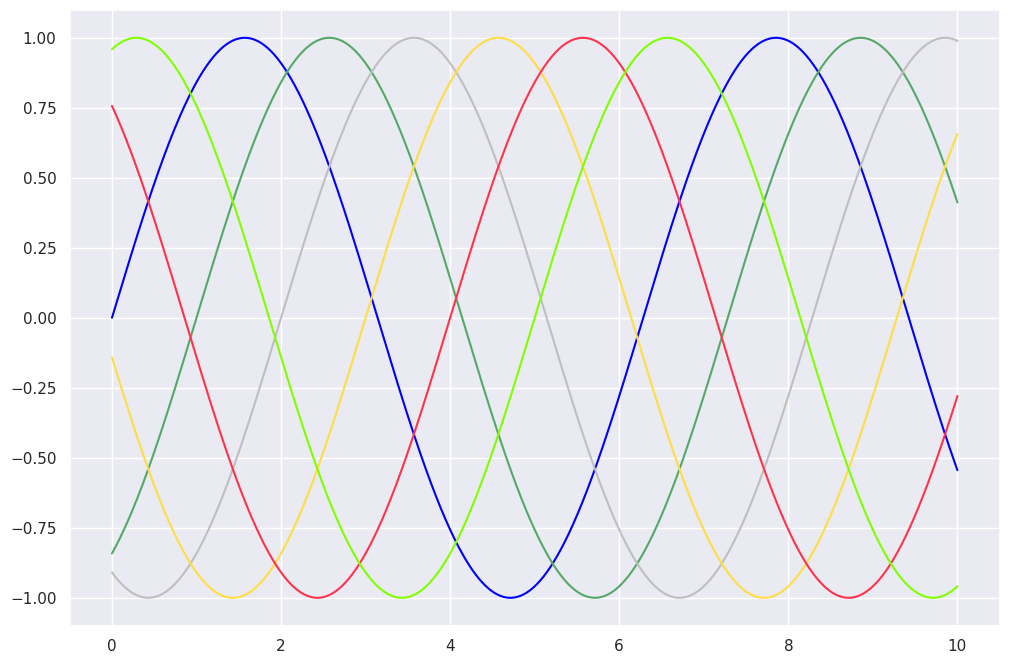

In [191]:
fig = plt.figure(figsize=[12,8])
ax = plt.axes()


x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x - 0), color='blue') # specify color by name
plt.plot(x, np.sin(x - 1), color='g') # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75') # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44') # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

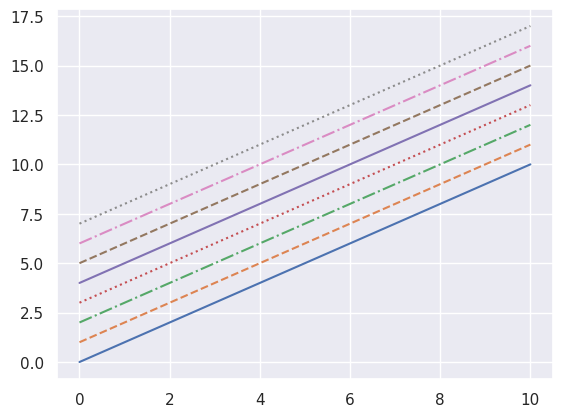

In [192]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');
# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-') # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':'); # dotted

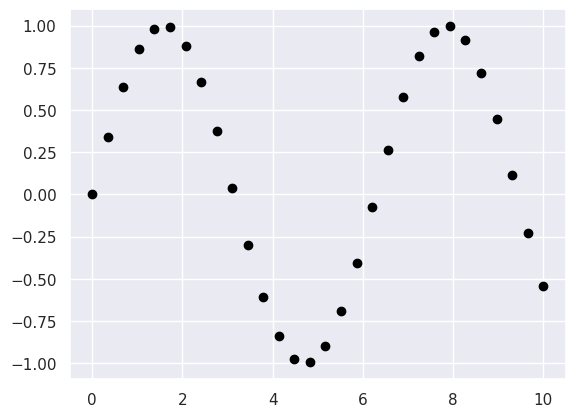

In [193]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

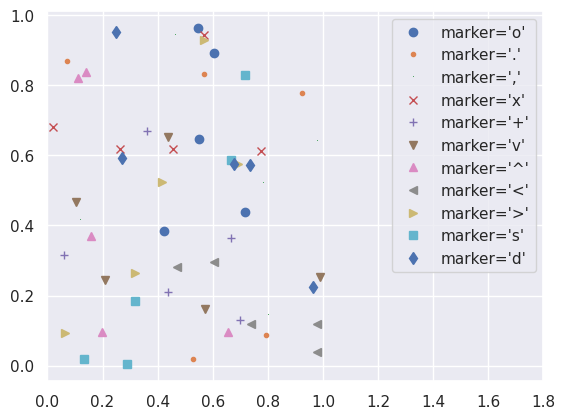

In [195]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
    label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

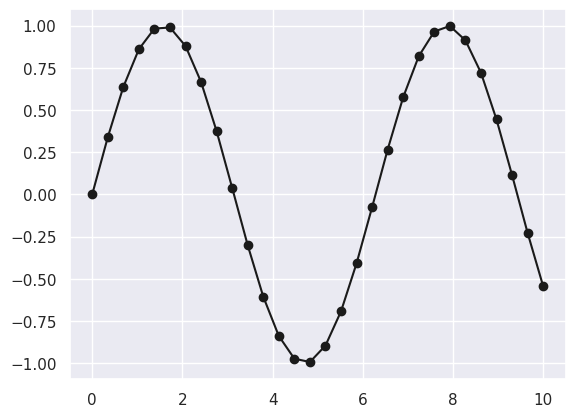

In [196]:
plt.plot(x, y, '-ok'); # line (-), circle marker (o), black (k)

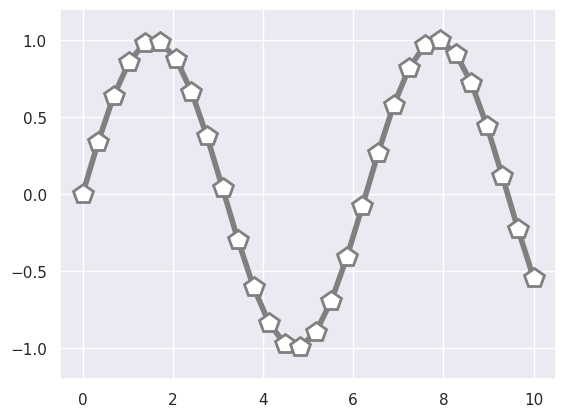

In [197]:
plt.plot(x, y, '-p', color='gray',
markersize=15, linewidth=4,
markerfacecolor='white',
markeredgecolor='gray',
markeredgewidth=2)
plt.ylim(-1.2, 1.2);

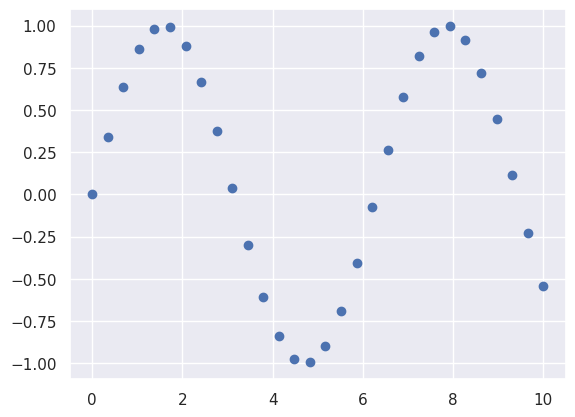

In [198]:
plt.scatter(x, y, marker='o');

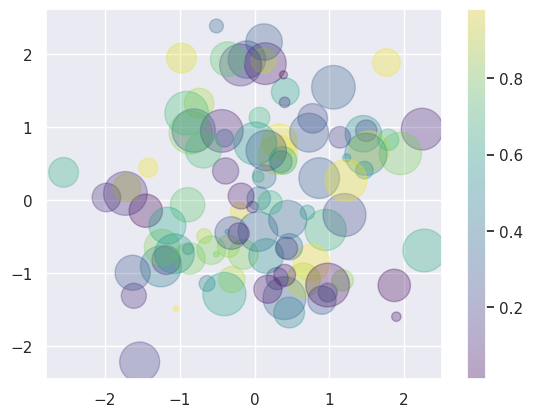

In [199]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
cmap='viridis')
plt.colorbar(); # show color scale

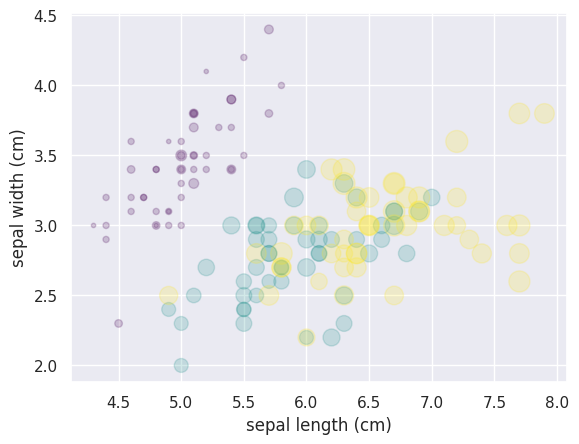

In [200]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.2,
s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

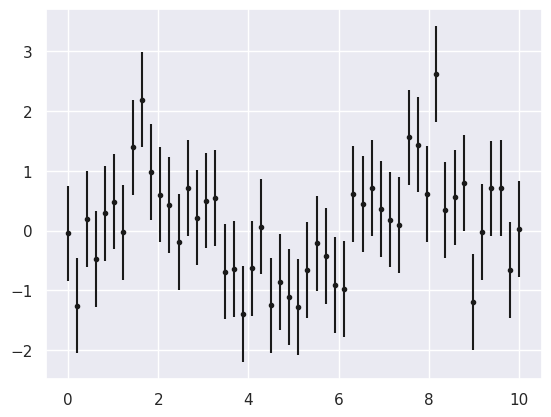

In [201]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k');

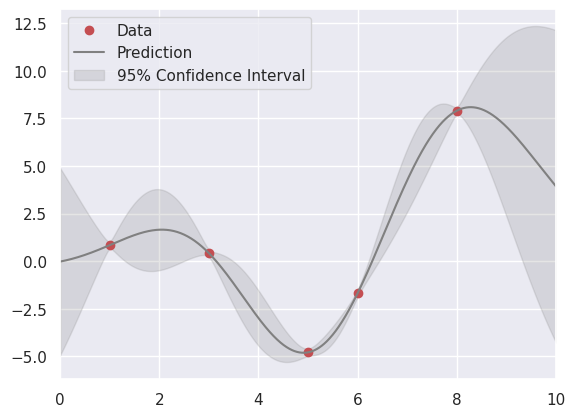

In [205]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib.pyplot as plt

# Define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Define the kernel and the Gaussian process regressor
kernel = C(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)

# Fit the model
gp.fit(xdata[:, np.newaxis], ydata)

# Predict and compute confidence intervals
xfit = np.linspace(0, 10, 1000)
yfit, sigma = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * sigma  # 2*sigma ~ 95% confidence region

# Visualize the result
plt.plot(xdata, ydata, 'or', label="Data")
plt.plot(xfit, yfit, '-', color='gray', label="Prediction")
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2, label="95% Confidence Interval")
plt.xlim(0, 10)
plt.legend()
plt.show()


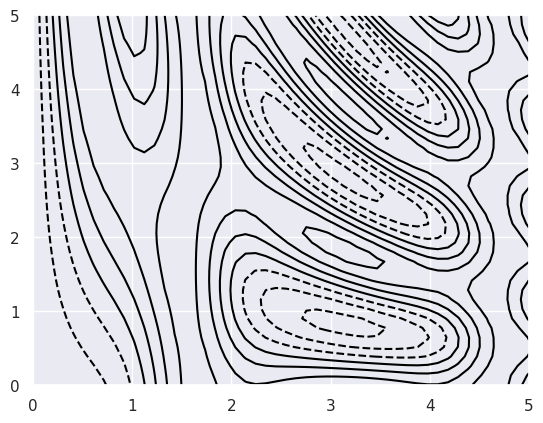

In [208]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, colors='black');

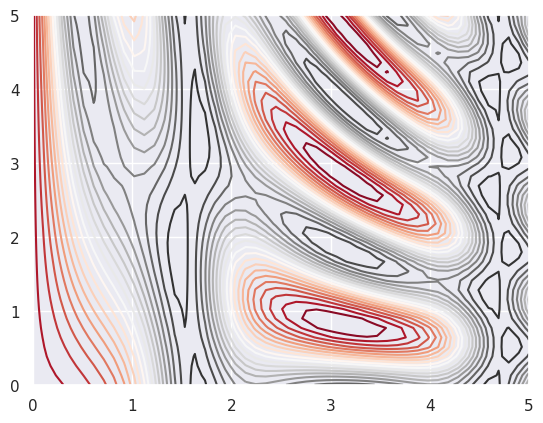

In [209]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

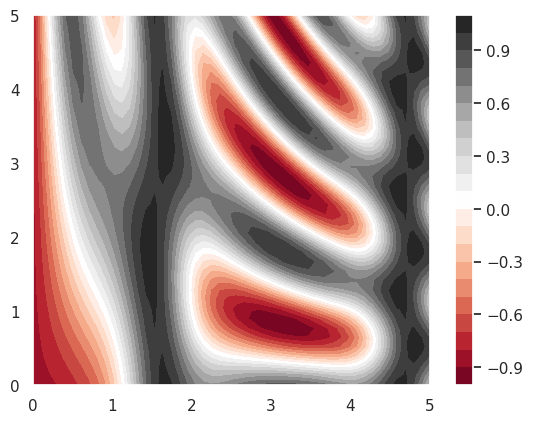

In [210]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

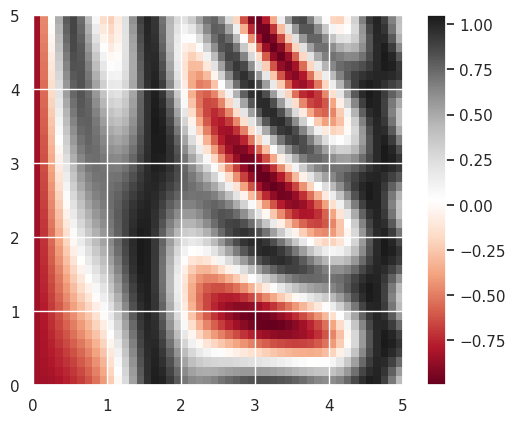

In [213]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()
# plt.axis(aspect='image');

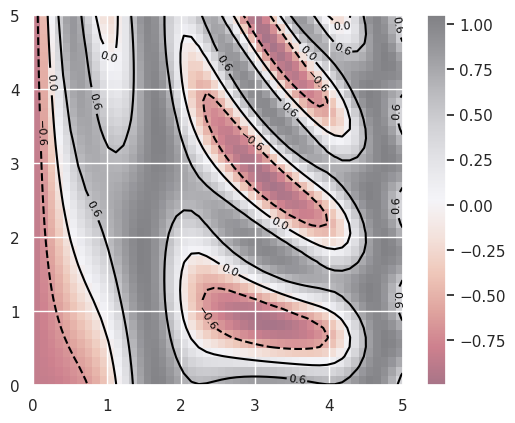

In [214]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy', alpha=0.5)
plt.colorbar();

(array([ 10.,  38.,  83., 169., 231., 218., 148.,  69.,  22.,  12.]),
 array([-2.90170473, -2.30762661, -1.7135485 , -1.11947038, -0.52539227,
         0.06868585,  0.66276397,  1.25684208,  1.8509202 ,  2.44499831,
         3.03907643]),
 <BarContainer object of 10 artists>)

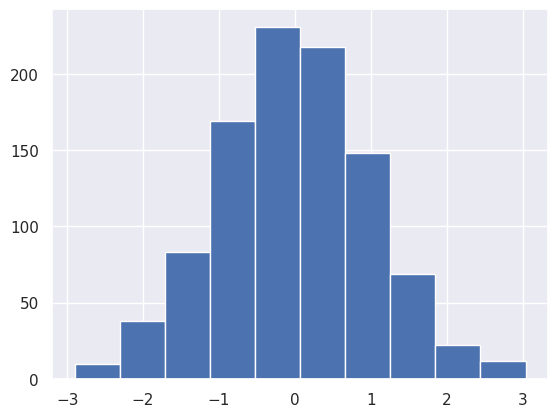

In [215]:
data = np.random.randn(1000)
plt.hist(data)

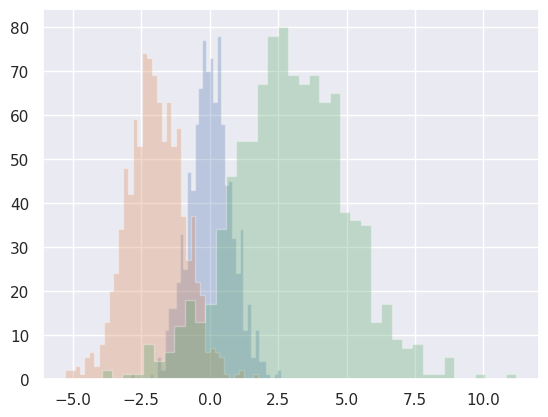

In [217]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

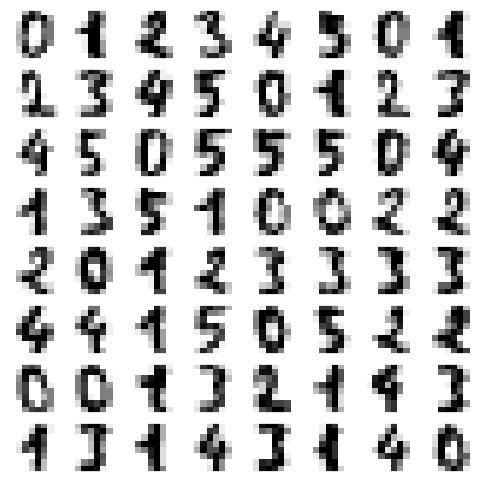

In [219]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

/home/kenuey/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/kenuey/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/tmp/ipykernel_15829/1250956822.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))


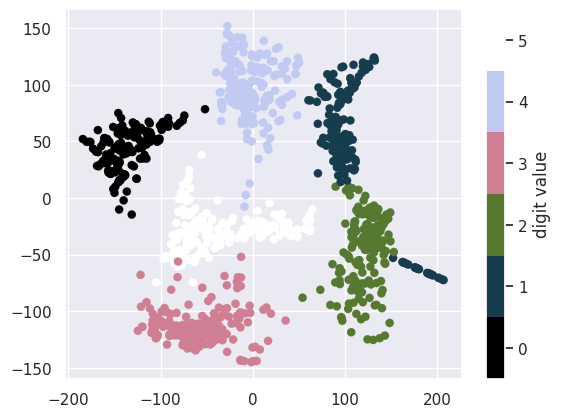

In [220]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/kenuey/scikit_learn_data


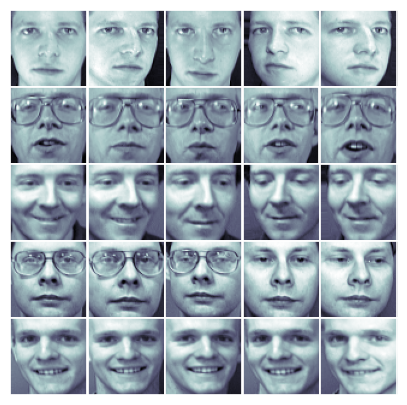

In [223]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)
# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images
for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

In [227]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

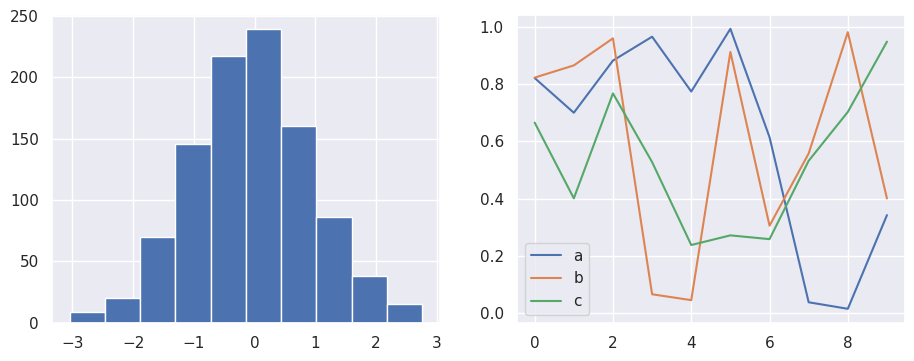

In [229]:
hist_and_lines()

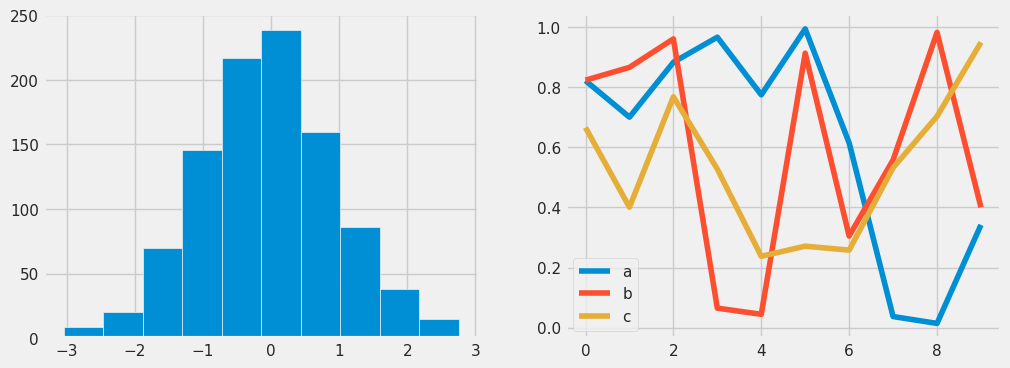

In [230]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

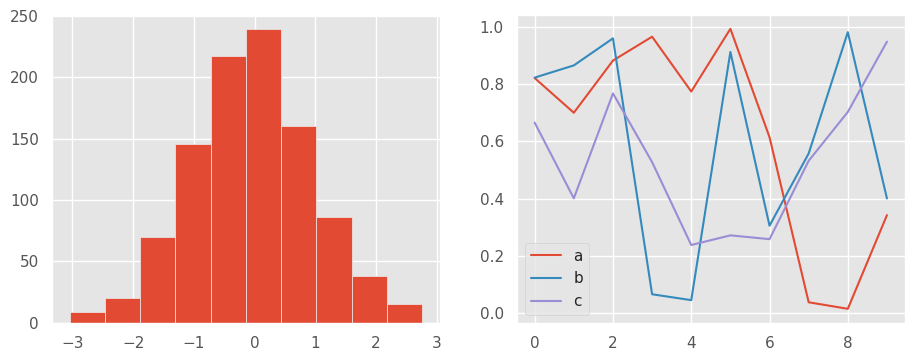

In [231]:
with plt.style.context('ggplot'):
    hist_and_lines()

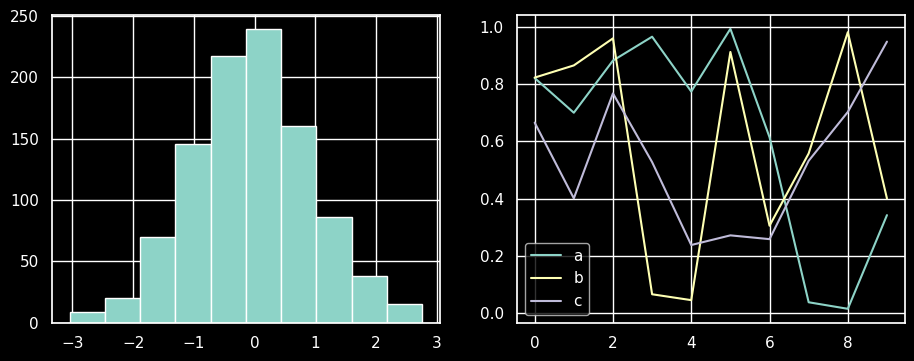

In [232]:
with plt.style.context('dark_background'):
    hist_and_lines()

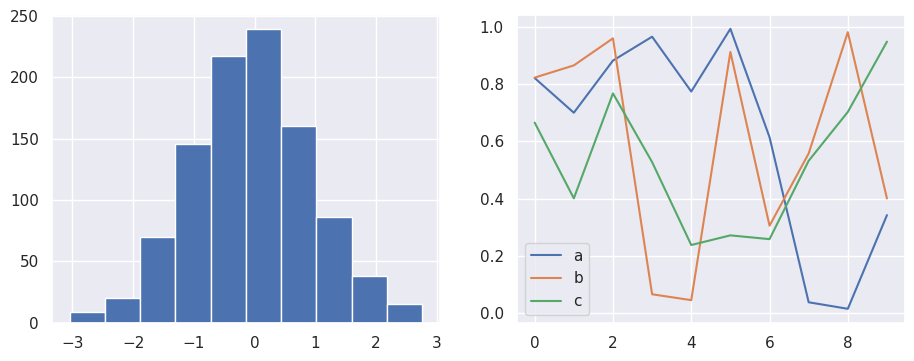

In [233]:
import seaborn
hist_and_lines()